# TP OpenMP
## Part 1 : Pi
### Compilation

In [1]:
import os
os.makedirs('dist/part1', exist_ok=True)

!g++ -o dist/part1/tp_openmp_part_1_pi_impl_atomic src/part1/tp_openmp_part_1_atomic.cpp -fopenmp -O3 -march=native
!g++ -o dist/part1/tp_openmp_part_1_pi_impl_critical src/part1/tp_openmp_part_1_critical.cpp -fopenmp -O3 -march=native
!g++ -o dist/part1/tp_openmp_part_1_pi_impl_reduced src/part1/tp_openmp_part_1_reduced.cpp -fopenmp -O3 -march=native
!g++ -o dist/part1/tp_openmp_part_1_pi_impl_split src/part1/tp_openmp_part_1_split.cpp -fopenmp -O3 -march=native

### Performance evaluation

In [ ]:
import os
import subprocess
import csv
import time

try:
    os.remove("saved_metrics/part1.csv")
except OSError:
    pass
os.makedirs('saved_metrics',exist_ok=True)

num_steps = [1000, 100000, 10000000]
nb_core = [1, 2, 4, 8]
repeats = range(0,10)
dist_dir = "dist/part1"
csv_fields = ["version", "nbcore", "num_steps", "runtime"]

with open('./saved_metrics/part1.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(csv_fields)



    for nsteps in num_steps:
        for ncore in nb_core:
            for repeat in repeats:
                for file in os.listdir(dist_dir):
                    if file.startswith('.'):
                        continue
                    filename = os.path.join(os.getcwd(), dist_dir ,os.fsdecode(file))
                    args = (filename, "-C", str(ncore), "-N", str(nsteps))
                    start = time.time()
                    popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                    popen.wait()
                    end = time.time()
                    version = os.fsdecode(file).split('_')[-1]
                    writer.writerow([version, ncore, nsteps, end-start])

csvFile.close()

### Performance analysis
#### Weak scaling

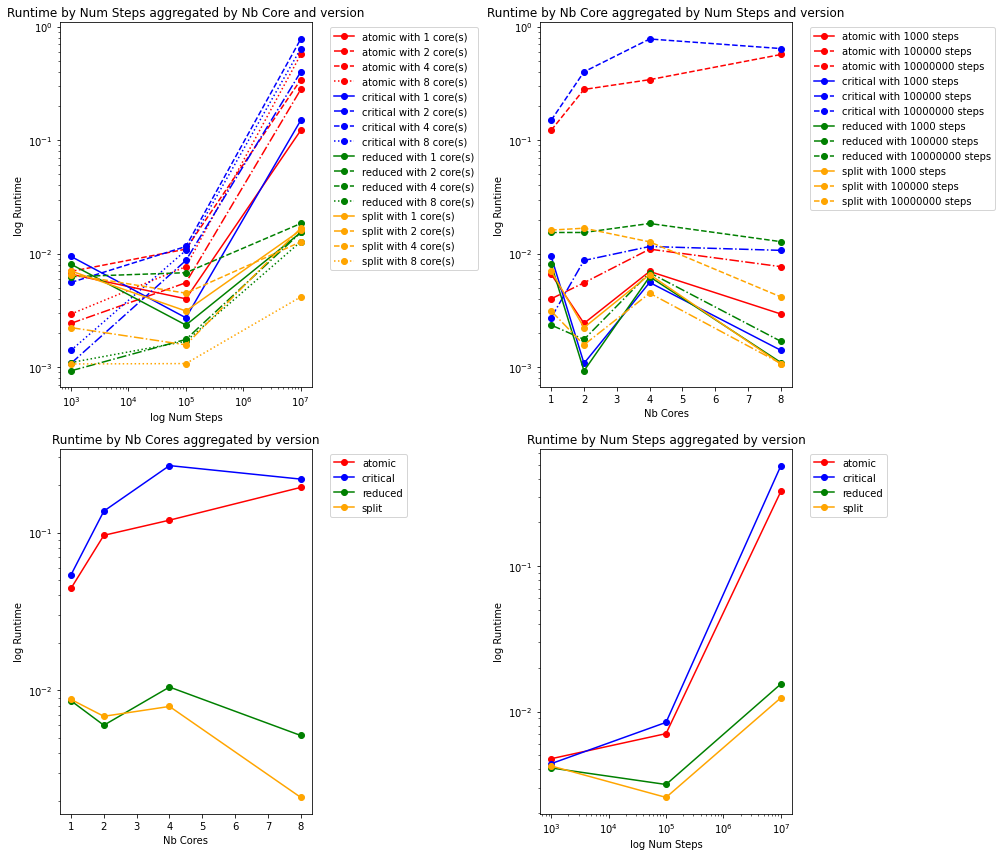

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(
    './saved_metrics/part1.csv',
    skiprows=1,
    names=['version','nbcore','num_steps','runtime'],
    dtype={
        'version': str,
        'nbcore': int,
        'num_steps': int,
        'runtime': float
    })

versionColor = {"critical": "blue", "atomic": "red", "reduced": "green", "split": "orange"}
coreStyle = {1: "solid", 2: "dashdot", 4: "dashed", 8:"dotted"}
numStepStyle = {1000: "solid", 100000: "dashdot", 10000000:"dashed", 1000000000:"dotted"}

df_avg_glbl = df.groupby(['version', 'num_steps', 'nbcore'], as_index=False)['runtime'].mean()

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for version in df_avg_glbl['version'].unique():
    for nbcore in df_avg_glbl['nbcore'].unique():
        df_plot = df_avg_glbl[(df_avg_glbl['nbcore'] == nbcore) & (df_avg_glbl['version'] == version)]
        axes[0, 0].plot(
            df_plot['num_steps'].to_numpy(),
            df_plot['runtime'].to_numpy(),
            linestyle=coreStyle[nbcore], color=versionColor[version],
            marker='o', label=f'{version} with {nbcore} core(s)'
        )

for version in df_avg_glbl['version'].unique():
    for numStep in df_avg_glbl['num_steps'].unique():
        df_plot = df_avg_glbl[(df_avg_glbl['num_steps'] == numStep) & (df_avg_glbl['version'] == version)]
        axes[0, 1].plot(
            df_plot['nbcore'].to_numpy(),
            df_plot['runtime'].to_numpy(),
            linestyle=numStepStyle[numStep], color=versionColor[version],
            marker='o', label=f'{version} with {numStep} steps'
        )

df_avg_by_numCores = df.groupby(['version', 'nbcore'], as_index=False)['runtime'].mean()
for version in df_avg_by_numCores['version'].unique():
    df_plot = df_avg_by_numCores[df_avg_by_numCores['version'] == version]
    axes[1, 0].plot(
        df_plot['nbcore'].to_numpy(),
        df_plot['runtime'].to_numpy(),
        color=versionColor[version],
        marker='o', label=f'{version}'
    )

df_avg_by_numSteps = df.groupby(['version', 'num_steps'], as_index=False)['runtime'].mean()
for version in df_avg_by_numSteps['version'].unique():
    df_plot = df_avg_by_numSteps[df_avg_by_numSteps['version'] == version]
    axes[1, 1].plot(
        df_plot['num_steps'].to_numpy(),
        df_plot['runtime'].to_numpy(),
        color=versionColor[version], marker='o',
        label=f'{version}'
    )


axes[0, 0].set_xlabel('log Num Steps')
axes[0, 0].set_xscale('log')
axes[0, 0].set_title('Runtime by Num Steps aggregated by Nb Core and version')
axes[0, 1].set_xlabel('Nb Cores')
axes[0, 1].set_title('Runtime by Nb Core aggregated by Num Steps and version')
axes[1, 0].set_xlabel('Nb Cores')
axes[1, 0].set_title('Runtime by Nb Cores aggregated by version')
axes[1, 1].set_xlabel('log Num Steps')
axes[1, 1].set_xscale('log')
axes[1, 1].set_title('Runtime by Num Steps aggregated by version')


for ax in axes.flat:
    ax.set_ylabel('log Runtime')
    ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    
plt.tight_layout()
plt.show()


## Part 2 : Matrix Vector Operation
### Compilation

In [2]:
import os
os.makedirs('dist/part2', exist_ok=True)

!g++ -o dist/part2/tp_openmp_part_2_vector_sequential src/part2/tp_openmp_part_2_vector_sequential.cpp -fopenmp -O3 -march=native
!g++ -o dist/part2/tp_openmp_part_2_vector_pragma_SIMD src/part2/tp_openmp_part_2_vector_pragma_SIMD.cpp -fopenmp -O3 -march=native
!g++ -o dist/part2/tp_openmp_part_2_vector_pragma src/part2/tp_openmp_part_2_vector_pragma.cpp -fopenmp -O3 -march=native

### Performance Evaluation

In [ ]:
import os
import subprocess
import csv
import time

try:
    os.remove("saved_metrics/part2.csv")
except OSError:
    pass
os.makedirs('saved_metrics',exist_ok=True)

N = [2, 4, 8, 10, 12, 14 ,16]
M = [1, 3, 7, 9, 11, 13]
nb_core = [1, 2, 4, 8]
repeats = range(0,10)
dist_dir = "dist/part2"
csv_fields = ["version", "nbcore", "N", "M", "runtime"]

with open('./saved_metrics/part2.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(csv_fields)



    for n in N:
        for m in M:
            for ncore in nb_core:
                for repeat in repeats:
                    for file in os.listdir(dist_dir):
                        if file.startswith('.'):
                            continue
                        filename = os.path.join(os.getcwd(), dist_dir ,os.fsdecode(file))
                        args = (filename, "-C", str(ncore), "-N", str(n), "-M", str(m), "-nrepeat", str(1))
                        start = time.time()
                        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                        popen.wait()
                        end = time.time()
                        version = os.fsdecode(file).split('_')[-1]
                        writer.writerow([version, ncore, n, m, end-start])

csvFile.close()

### Performance analysis
#### Weak scaling

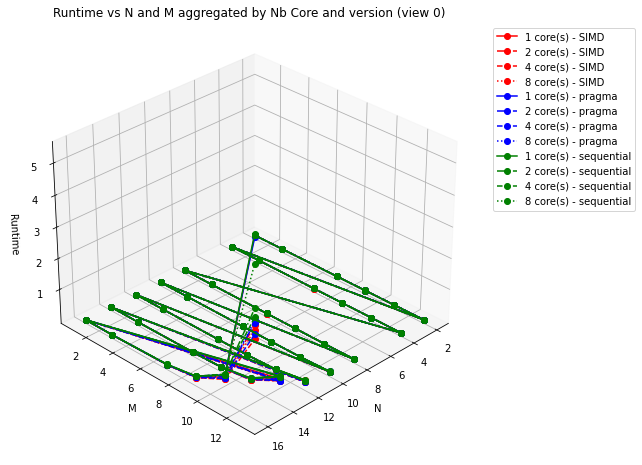

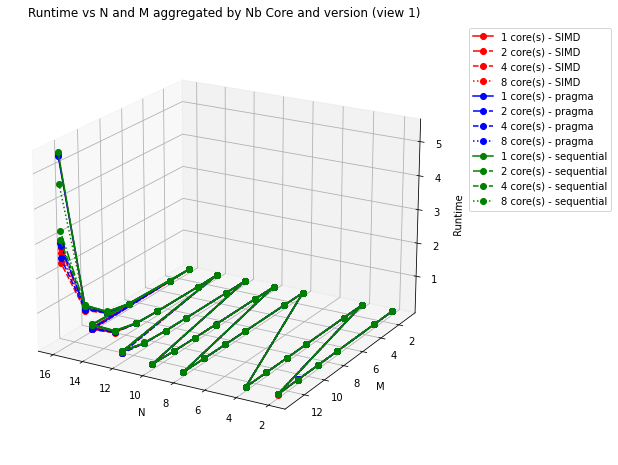

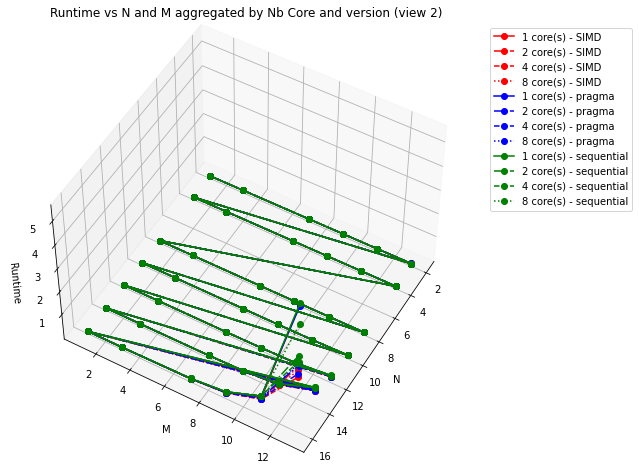

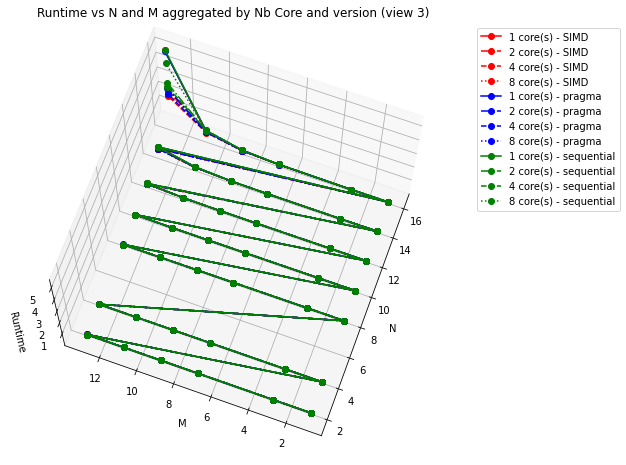

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(
    './saved_metrics/part2.csv', 
    skiprows=1, 
    names=['version','nbcore','N', 'M', 'runtime'], 
    dtype={
        'version': str,
        'nbcore': int,
        'N': int,
        'M' : int,
        'runtime': float
    }
)

versionColor = {"SIMD": "red", "pragma" : "blue", "sequential" : "green"}
coreStyle = {1: "solid", 2: "dashdot", 4: "dashed", 8:"dotted"}

df_avg_glbl = df.groupby(['version', 'nbcore', 'N', 'M'], as_index=False)['runtime'].mean()

angles = [(30, 45), (20, 120), (50, 30), (70, 200)]

for i, (elev, azim) in enumerate(angles):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')

    for version in df_avg_glbl['version'].unique():
        for nbcore in df_avg_glbl['nbcore'].unique():
            df_plot = df_avg_glbl[
                (df_avg_glbl['nbcore'] == nbcore) & 
                (df_avg_glbl['version'] == version)
            ]
            ax.plot(
                df_plot['N'].to_numpy(),
                df_plot['M'].to_numpy(),
                df_plot['runtime'].to_numpy(),
                linestyle=coreStyle[nbcore],
                color=versionColor[version],
                marker='o',
                label=f'{nbcore} core(s) - {version}'
            )

    ax.set_xlabel('N')
    ax.set_ylabel('M')
    ax.set_zlabel('Runtime')
    ax.set_title(f'Runtime vs N and M aggregated by Nb Core and version (view {i})')

    ax.view_init(elev=elev, azim=azim)

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()


## Part 3 : Fibo
### Compilation

In [3]:
import os
os.makedirs('dist/part3', exist_ok=True)

!g++ -o dist/part3/tp_openmp_part_3_fib_sequential src/part3/tp_openmp_part_3_fib_sequential.cpp -fopenmp -O3 -march=native
!g++ -o dist/part3/tp_openmp_part_3_fib_pragma src/part3/tp_openmp_part_3_fib_pragma.cpp -fopenmp -O3 -march=native

### Performance Evaluation

In [ ]:
import os
import subprocess
import csv
import time

try:
    os.remove("saved_metrics/part3.csv")
except OSError:
    pass
os.makedirs('saved_metrics',exist_ok=True)

N = [2, 4, 8, 10]
nb_core = [1, 2, 4, 8]
repeats = range(0,10)
dist_dir = "dist/part3"
csv_fields = ["version", "nbcore", "N", "runtime"]

with open('./saved_metrics/part3.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(csv_fields)

    for n in N:
        for ncore in nb_core:
            for repeat in repeats:
                for file in os.listdir(dist_dir):
                    if file.startswith('.'):
                        continue
                    filename = os.path.join(os.getcwd(), dist_dir ,os.fsdecode(file))
                    args = (filename, "-C", str(ncore), "-N", str(n))
                    start = time.time()
                    popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                    popen.wait()
                    end = time.time()
                    version = os.fsdecode(file).split('_')[-1]
                    writer.writerow([version, ncore, n, end-start])

csvFile.close()

### Performance analysis
#### Weak scaling

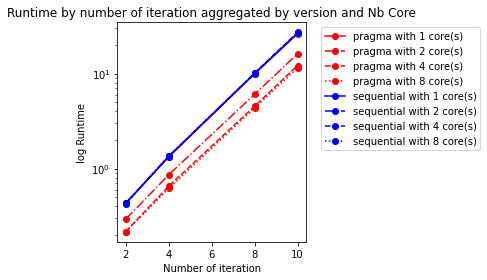

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(
    './saved_metrics/part3.csv',
    skiprows=1,
    names=['version','nbcore','N','runtime'],
    dtype={
        'version': str,
        'nbcore': int,
        'N': int,
        'runtime': float
    })

coreStyle = {1: "solid", 2: "dashdot", 4: "dashed", 8:"dotted"}
versionColor = {"pragma": "red", "sequential": "blue"}



df_avg_glbl = df.groupby(['version', 'nbcore', 'N'], as_index=False)['runtime'].mean()

plt.figure()

for version in df_avg_glbl['version'].unique():
    for nbcore in df_avg_glbl['nbcore'].unique():
        df_plot = df_avg_glbl[(df_avg_glbl['nbcore'] == nbcore) & (df_avg_glbl['version'] == version)]
        plt.plot(
            df_plot['N'].to_numpy(),
            df_plot['runtime'].to_numpy(),
            linestyle=coreStyle[nbcore], color = versionColor[version],
            marker='o', label=f'{version} with {nbcore} core(s)'
        )
    



plt.title('Runtime by number of iteration aggregated by version and Nb Core')
plt.yscale('log')
plt.xlabel('Number of iteration')
plt.ylabel('log Runtime')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
